<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/2023-05-08-10wk-1-mid.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

**제출은 `*.ipynb`, `*.html`, `*.pdf` 파일로 제출할 것** 

- `ipynb` 파일형태제출을 권장함. 

# Imports 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import PIL
import io 
import requests

# 1. Numpy and Pandas (35점)

## FIFA23

`(1)--(3)` 아래는 FIFA23 자료를 불러오는 코드이다. 

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv').drop(columns=['Loaned From', 'Best Overall Rating']).dropna().reset_index(drop=True)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,Kit Number
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",2026,189cm,82kg,€157M,8.0
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",2026,179cm,69kg,€155M,8.0
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",2024,172cm,69kg,€97.7M,19.0
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",2025,181cm,70kg,€198.9M,17.0
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",2026,172cm,68kg,€154.4M,23.0


`(1)` 공백이 포함된 column이름이 총 몇개인지 count하는 코드를 작성하라.

**hint** 모두 11개의 column name에 공백이 포함되어있음 

`(풀이)`

In [9]:
sum([' ' in name for name in df.columns])

11

`(2)` column name에 공백이 포함된 열을 출력하라. 

`(풀이)`

In [10]:
df.loc[:,[' ' in name for name in df.columns]]

,Club Logo,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Contract Valid Until,Release Clause,Kit Number
0,https://cdn.sofifa.net/teams/21/30.png,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,2026,€157M,8.0
1,https://cdn.sofifa.net/teams/11/30.png,Right,3.0,3.0,4.0,High/ High,Unique,Yes,2026,€155M,8.0
2,https://cdn.sofifa.net/teams/481/30.png,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),No,2024,€97.7M,19.0
3,https://cdn.sofifa.net/teams/10/30.png,Right,4.0,5.0,4.0,High/ High,Unique,Yes,2025,€198.9M,17.0
4,https://cdn.sofifa.net/teams/44/30.png,Right,3.0,3.0,3.0,High/ High,Normal (170-),Yes,2026,€154.4M,23.0
...,...,...,...,...,...,...,...,...,...,...,...
16359,https://cdn.sofifa.net/teams/114628/30.png,Right,1.0,3.0,1.0,Medium/ Medium,Normal (185+),No,2027,€218K,35.0
16360,https://cdn.sofifa.net/teams/1478/30.png,Right,1.0,2.0,1.0,Medium/ Medium,Lean (185+),No,2026,€188K,21.0
16361,https://cdn.sofifa.net/teams/113796/30.png,Right,1.0,2.0,1.0,Medium/ Medium,Lean (185+),No,2023,€142K,12.0
16362,https://cdn.sofifa.net/teams/112260/30.png,Right,1.0,2.0,1.0,Medium/ Medium,Normal (185+),No,2021,€214K,40.0


`(3)` 데이터프레임을 올바르게 해석한 사람을 모두 고르시오 (모두 맞출경우만 정답으로 인정)

- 세민: 데이터프레임에는 모두 27개의 열이 있다. 
- 성재: 한국선수(`Nationality==Korea Republic`)와 일본선수(`Nationality==Japan`)의 `Overall`의 평균값은 일본이 더 높다. 
- 민정: 총 159개의 나라선수들이 포함되어 있다. 
- 슬기: 선수들의 연령이 25세이상(>=)인 선수들은 그렇지 않은 선수들보다 평균적으로 키(`Height`)가크다. 

`(풀이)`

**세민**: 데이터프레임에는 모두 27개의 열이 있다 -> True

In [11]:
len(df.columns) == 27

True

**성재**:  한국선수(Nationality==Korea Republic)와 일본선수(Nationality==Japan)의 Overall의 평균값은 일본이 더 높다. -> True

In [12]:
df.query('Nationality == "Korea Republic"').Overall.mean() < df.query('Nationality == "Japan"').Overall.mean()

True

**민정**: 총 159개의 나라선수들이 포함되어 있다. -> True

In [13]:
len(set(df.Nationality))==159

True

**슬기**: 선수들의 연령이 25세이상(>=)인 선수들은 그렇지 않은 선수들보다 평균적으로 키(`Height`)가크다. -> True

In [14]:
_old = np.mean([int(height[:3]) for height in df.query('Age>=25').Height.tolist()]) 
_young =  np.mean([int(height[:3]) for height in df.query('Age<25').Height.tolist()]) 
_old > _young

True

## 삼성전자의 주가 

`(4)--(5)` 다음은 삼성전자의 주가를 크롤링하는 코드이다. 

In [16]:
start_date = "2023-01-01"
end_date = "2023-05-02"
y = yf.download("005930.KS", start=start_date, end=end_date)['Adj Close'].to_numpy()

[*********************100%***********************]  1 of 1 completed


삼성전자의 주가 ${\boldsymbol y}$를 시각화하면 아래와 같다. 

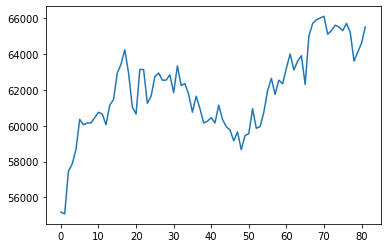

In [17]:
plt.plot(y)

`(4)` 아래와 같은 변환을 이용하여 ${\boldsymbol y}$를 $\tilde {\boldsymbol y}$로 변환하고 결과를 시각화하라. 

- $\tilde{y}_1= \frac{1}{4}(3y_1 + y_2)$
- $\tilde{y}_i= \frac{1}{4}(y_{i-1}+2y_i+y_{i+1})$, for $i=2,3,\dots,n-1$ 
- $\tilde{y}_n= \frac{1}{4}(y_{n-1}+3y_{n})$

**hint**: 아래의 코드를 관찰 

In [18]:
np.eye(4) + np.array([abs(i-j)<2 for i in range(4) for j in range(4)]).reshape(4,4) 

array([[2., 1., 0., 0.],
       [1., 2., 1., 0.],
       [0., 1., 2., 1.],
       [0., 0., 1., 2.]])

`(풀이)`

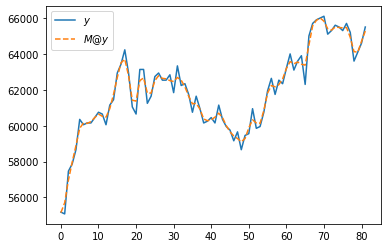

In [19]:
T = len(y)
M = (np.eye(T) + np.array([abs(i-j)<2 for i in range(T) for j in range(T)]).reshape(T,T))/4
M[0,0] = 3/4; M[-1,-1]= 3/4 
plt.plot(y,label=r'$y$')
plt.plot(M@y,'--',label=r'$M@y$')
plt.legend()

`(5)` `(4)`의 변환을 50회 반복적용하고 결과를 시각화하라. 

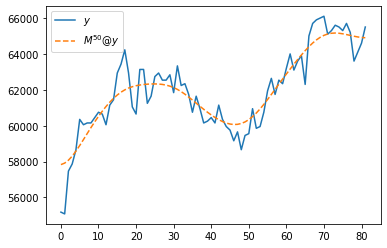

In [20]:
plt.plot(y,label=r'$y$')
plt.plot(np.linalg.matrix_power(M,50)@y,'--',label=r'$M^{50}@y$')
plt.legend()

## 회귀모형 

`(6)--(7)` $(x_i,y_i)$가 아래와 같이 주어졌다고 가정하자. 

In [21]:
x =  np.array([0.00983, 0.01098, 0.02951, 0.0384 , 0.03973, 0.04178, 0.0533 ,
               0.058  , 0.09454, 0.1103 , 0.1328 , 0.1412 , 0.1497 , 0.1664 ,
               0.1906 , 0.1923 , 0.198  , 0.2141 , 0.2393 , 0.2433 , 0.3157 ,
               0.3228 , 0.3418 , 0.3552 , 0.3918 , 0.3962 , 0.4    , 0.4482 ,
               0.496  , 0.507  , 0.53   , 0.5654 , 0.582  , 0.5854 , 0.5854 ,
               0.6606 , 0.7007 , 0.723  , 0.7305 , 0.7383 , 0.7656 , 0.7725 ,
               0.831  , 0.8896 , 0.9053 , 0.914  , 0.949  , 0.952  , 0.9727 ,
               0.982  ])
y =  np.array([0.7381, 0.7043, 0.3937, 0.1365, 0.3784, 0.3028, 0.1037, 0.3846,
               0.706 , 0.7572, 0.2421, 0.232 , 0.9855, 1.162 , 0.4653, 0.6791,
               0.6905, 0.6865, 0.9757, 0.7665, 0.9522, 0.4641, 0.5498, 1.1509,
               0.5288, 1.1195, 1.1659, 1.4341, 1.2779, 1.1648, 1.4002, 0.7472,
               0.9142, 0.9658, 1.0707, 1.4501, 1.6758, 0.8778, 1.3384, 0.7476,
               1.3086, 1.7537, 1.5559, 1.2928, 1.3832, 1.3115, 1.3382, 1.536 ,           
               1.9177, 1.2069])

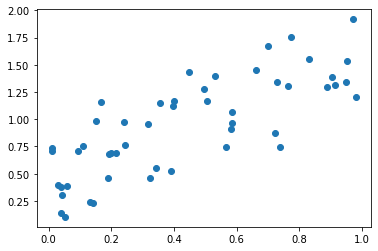

In [22]:
plt.plot(x,y,'o')

`6`. 아래의 수식을 이용하여 적절한 추세선 $\hat{y}_i= \hat{\beta}_0 +\hat{\beta}_1 x_i$를 구하고 시각화하라. 

$$\begin{bmatrix} \hat{\beta}_0 \\ \hat{\beta}_1 \end{bmatrix} = ({\bf X}^T {\bf X})^{-1}{\bf X}^T {\boldsymbol y}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n \end{bmatrix}$$ 

(풀이)

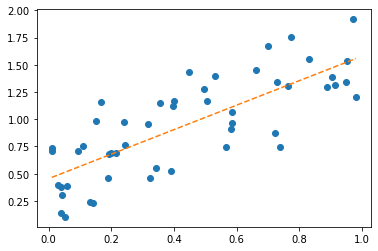

In [27]:
n = len(x)
X = np.stack([np.ones(n),x],axis=1)
b,a = np.linalg.inv(X.T@X)@X.T@y 
yhat = b+a*x 
plt.plot(x,y,'o')
plt.plot(x,yhat,'--')

`7`. $\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2$을 계산하라. 

`(풀이)`

In [31]:
np.mean((y-yhat)**2)

0.07602899763337416

# 2. fashion MNIST data (60점)

아래는 9가지의 의류이미지가 저장된 이미지데이터를 불러오는 코드이다. 

In [32]:
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')

In [33]:
def rshp(row):
    return row.reshape(28,28)

In [34]:
xtrain = np.apply_along_axis(rshp,axis=1,arr=np.array(df_train.iloc[:,1:]))
xtest  = np.apply_along_axis(rshp,axis=1,arr=np.array(df_test.iloc[:,1:]))
ytrain = np.array(df_train.label)
ytest  = np.array(df_test.label)

아래는 데이터에 대한 설명이다. 

- 전체의 이미지의 수는 70000개이며, 60000개의 이미지 ${\tt xtrain}$에 10000개의 이미지는 ${\tt xtest}$에 저장되어 있다. 
- 이미지에 대한 라벨은 각각 ${\tt ytrain}$과 $\tt ytest$에 저장되어 있다. 따라서 $\tt ytrain$에는 60000개의 이미지에 해당하는 라벨이, $\tt ytest$에는 10000개의 이미지에 해당하는 라벨이 기록되어 있다. 
- 보통 분석에서는 60000개의 이미지를 가지고 라벨을 맞추는 "훈련"을 하고 (${\tt xtrain}$을 이용하여 ${\tt ytrain}$을 맞추는 방법을 학습하고), 그러한 훈련이 잘 되었는지 10000개의 이미지를 이용하여 "테스트"한다. 
- 위와 같은 의미로 $({\tt xtrain}, {\tt ytrain})$ 을 training data set, $({\tt xtest},{\tt ytest})$ 를 test data set 이라고 부른다. (ref: [위키참고](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets))

아래는 이미지자료와 시각화에 대한 설명이다. 

- 각 이미지는 (28,28) 픽셀의 흑백이미지이다. 따라서 각 이미지는 (28,28,3) 이 아니라 (28,28) 의 shape을 가진 텐서로 구성되어있다. 
- 흑백이미지를 시각화 하기 위해서는 `plt.imshow(img, cmap='gray')`를 이용한다. 여기에서 ${\tt img}$은 임의의 2차원 텐서이며 이 예제의 경우 (28,28)의 shape을 가진다. 

아래는 ${\tt xtrain}$의 두번째 이미지, 즉 ${\tt xtrain[1,:,:]}$를 확인하는 코드의 예시이다. 

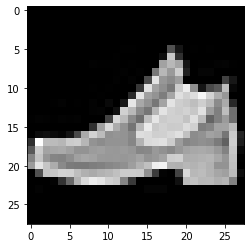

In [35]:
# plt.imshow(xtrain[1,:,:],cmap='gray')
plt.imshow(xtrain[1],cmap='gray') ## 같은코드임

이 이미지에 대한 label은 ${\tt ytrain[1]}$의 값으로 확인가능하다. 

In [36]:
ytrain[1]

9

이미지와 라벨을 한번에 표현하는 코드는 아래와 같이 작성가능하다. 

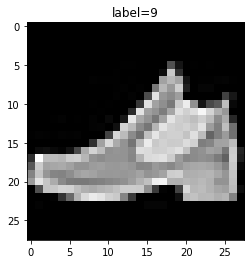

In [37]:
plt.imshow(xtrain[1],cmap='gray')
plt.title('label={}'.format(ytrain[1]));

여기에서 9가 의미하는 것은 'Ankel boot'이며, 다른 숫자가 의미하는 것은 각각 아래와 같다. 

In [38]:
labels= {0:'T-shirt/top', 
         1:'Trouser', 
         2:'Pullover', 
         3:'Dress', 
         4:'Coat', 
         5:'Sandal', 
         6:'Shirt', 
         7:'Sneaker', 
         8:'Bag', 
         9:'Ankel boot'} 

아래는 ${\tt xtrain}$의 처음 10개의 이미지를 라벨과 함께 출력하는 코드이다. 

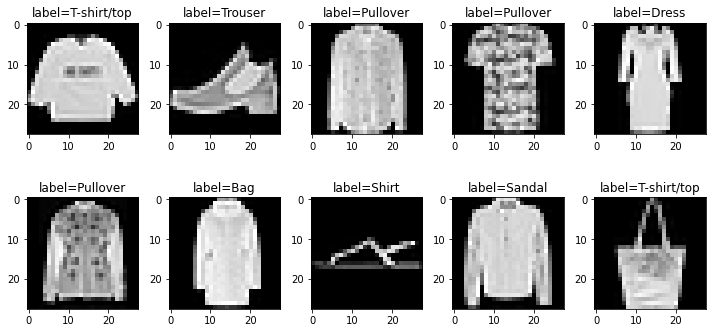

In [39]:
fig, ax = plt.subplots(2,5,figsize=(10,5))

ax[0][0].imshow(xtrain[0],cmap='gray'); ax[0][0].set_title('label={}'.format(labels[ytest[0]]));
ax[0][1].imshow(xtrain[1],cmap='gray'); ax[0][1].set_title('label={}'.format(labels[ytest[1]]));
ax[0][2].imshow(xtrain[2],cmap='gray'); ax[0][2].set_title('label={}'.format(labels[ytest[2]]));
ax[0][3].imshow(xtrain[3],cmap='gray'); ax[0][3].set_title('label={}'.format(labels[ytest[3]]));
ax[0][4].imshow(xtrain[4],cmap='gray'); ax[0][4].set_title('label={}'.format(labels[ytest[4]]));

ax[1][0].imshow(xtrain[5],cmap='gray'); ax[1][0].set_title('label={}'.format(labels[ytest[5]]));
ax[1][1].imshow(xtrain[6],cmap='gray'); ax[1][1].set_title('label={}'.format(labels[ytest[6]]));
ax[1][2].imshow(xtrain[7],cmap='gray'); ax[1][2].set_title('label={}'.format(labels[ytest[7]]));
ax[1][3].imshow(xtrain[8],cmap='gray'); ax[1][3].set_title('label={}'.format(labels[ytest[8]]));
ax[1][4].imshow(xtrain[9],cmap='gray'); ax[1][4].set_title('label={}'.format(labels[ytest[9]]));

fig.tight_layout()

---

`(1)` ${\tt xtrain}$에서 각 라벨에 대한 평균이미지를 계산하고 계산결과를 ${\tt imgmean}$에 길이가 10인 `list`로 저장하라. 즉 ${\tt imgmean}$은 아래와 같은 자료구조를 가지고 있어야 한다. 

- ${\tt imgmean}=\big[{\tt imgmean[0]},\dots, {\tt imgmean[9]}\big]$ 
- ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 (28,28)의 shape을 가진 numpy array 
- ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 숫자 0,1, ..., 9의 평균이미지를 의미

${\tt imgmean[0]},\dots, {\tt imgmean[9]}$를 시각화 하라.

`(풀이)`

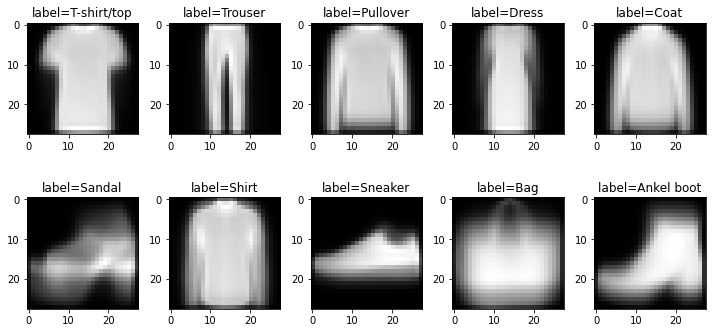

In [40]:
imgmean = [xtrain[ytrain==i].mean(axis=0) for i in range(10)] 

fig, ax = plt.subplots(2,5,figsize=(10,5))
ax[0][0].imshow(imgmean[0],cmap='gray'); ax[0][0].set_title('label={}'.format(labels[0]));
ax[0][1].imshow(imgmean[1],cmap='gray'); ax[0][1].set_title('label={}'.format(labels[1]));
ax[0][2].imshow(imgmean[2],cmap='gray'); ax[0][2].set_title('label={}'.format(labels[2]));
ax[0][3].imshow(imgmean[3],cmap='gray'); ax[0][3].set_title('label={}'.format(labels[3]));
ax[0][4].imshow(imgmean[4],cmap='gray'); ax[0][4].set_title('label={}'.format(labels[4]));
ax[1][0].imshow(imgmean[5],cmap='gray'); ax[1][0].set_title('label={}'.format(labels[5]));
ax[1][1].imshow(imgmean[6],cmap='gray'); ax[1][1].set_title('label={}'.format(labels[6]));
ax[1][2].imshow(imgmean[7],cmap='gray'); ax[1][2].set_title('label={}'.format(labels[7]));
ax[1][3].imshow(imgmean[8],cmap='gray'); ax[1][3].set_title('label={}'.format(labels[8]));
ax[1][4].imshow(imgmean[9],cmap='gray'); ax[1][4].set_title('label={}'.format(labels[9]));
fig.tight_layout()

`(2)` 아래와 같은 numpy array 를 생성하라. 

$${\tt loss}= 
\begin{bmatrix} 
{\tt loss[0,0]} & \dots & {\tt loss[0,9]} \\ 
{\tt loss[1,0]} & \dots & {\tt loss[1,9]} \\ 
\dots & \dots &  \dots \\ 
{\tt loss[59999,0]}& \dots &{\tt loss[59999,9]} \\ 
\end{bmatrix}$$

여기에서 

$${\tt loss[i,j]} = \frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[i,p,q]}-{\tt imgmean[j][p,q]}\big)^2$$

이다. 이제 ${\tt loss}$에서 "최소값을 가지는 원소의 인덱스를 출력"하는 함수를 행별로 적용해 이미지를 분류하라. 예를들어 모든 $j=0,1,\dots,9$ 에 대하여 아래를 계산한 결과 

$$\frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[1,p,q]}-{\tt imgmean[j][p,q]}\big)^2$$

$j=9$일 경우 그 값이 가장 작다면 ${\tt xtrain[1]}$ 이미지는 9번으로 분류한다. 분류한 결과와 실제 라벨 ${\tt ytrain}$을 비교하라. 얼마나 많은 결과가 일치하는지 비율을 계산하라. 

`(풀이)`

In [41]:
training_loss = np.array([[np.mean((xtrain[j,:,:]- imgmean[i])**2) for i in range(10)] for j in range(60000)])
ytrain_hat = training_loss.argmin(axis=1)
np.mean(ytrain_hat == ytrain)

0.6850666666666667

`(3)` ${\tt xtrain}$에서 학습한 평균이미지 ${\tt imgmean}$를 바탕으로 ${\tt xtest}$의 1번라벨에 해당하는 이미지만을 분류하라. 아래의 물음에 답하라. 

- 1번라벨에 해당하는 이미지를 0번라벨로 분류한 경우는 모두 몇건인가? (잘못된 분류) 
- 1번라벨에 해당하는 이미지를 1번라벨로 분류한 경우는 모두 몇건인가? (올바른 분류)
- $\dots$
- 1번라벨에 해당하는 이미지를 9번라벨로 분류한 경우는 모두 몇건인가? (잘못된 분류)

**hint**: 아래와 같은 결과를 주는 dictionary를 만들면 된다. 

```
{0: 28, 1: 895, 2: 11, 3: 36, 4: 8, 5: 12, 6: 10, 7: 0, 8: 0, 9: 0}
```

- 1번라벨에 해당하는 이미지를 0번라벨로 분류한 경우는 모두 28건
- 1번라벨에 해당하는 이미지를 1번라벨로 분류한 경우는 모두 895건
- $\dots$
- 1번라벨에 해당하는 이미지를 9번라벨로 분류한 경우는 모두 0건 


`(풀이)`

In [42]:
test_loss = np.array([[np.mean((xtest[j,:,:]- imgmean[i])**2) for i in range(10)] for j in range(10000)])
ytest_hat = test_loss.argmin(axis=1)
{j: ytest_hat[ytest==1].tolist().count(j) for j in range(10)}

{0: 28, 1: 895, 2: 11, 3: 36, 4: 8, 5: 12, 6: 10, 7: 0, 8: 0, 9: 0}

`(4)` ${\tt xtest}$의 이미지를 올바르게 분류한 비율을 카테고리별로 정리하라. 

`(풀이)`

In [43]:
{labels[j]:ytest_hat[ytest==j].tolist().count(j)/sum(ytest==j) for j in range(10)}

{'T-shirt/top': 0.7,
 'Trouser': 0.895,
 'Pullover': 0.496,
 'Dress': 0.802,
 'Coat': 0.599,
 'Sandal': 0.757,
 'Shirt': 0.202,
 'Sneaker': 0.794,
 'Bag': 0.761,
 'Ankel boot': 0.851}

# 3. 파이썬의 설치 (5점)

다음을 읽고 파이썬과 가상환경에 대하여 올바른 진술을 한 사람을 모두 골라라. (모두 맞출 경우만 정답으로 인정함) 

**민정**: 구글코랩은 사용자의 컴퓨터에 설치된 아나콘다를 기반으로 동작하며, 실제적으로는 사용자의 ipython과 크롬과의 통신만을 담당한다. 따라서 구글코랩은 반드시 파이썬만 연결하여 사용가능하지 않으며 실제로 구글코랩에 R을 연결하여 사용하기도 한다. 

**구환**: 아래와 같이 스크립트로 구성된 `mysum.py`와 같은 파이썬파일을 실행하기 위해서는 반드시 ipython 이나 주피터랩이 설치된 상태이어야 한다. 

```Python
## mysum.py
total = 0 
for i in range(1,11): 
    total = total + i
print(total)
```

**슬기**: 아나콘다를 이용하여 가상환경을 만들 경우 두 가지버전 이상의 python을 동시에 관리할 수 있다. 

**승민**: 아래와 같이 `myfuns.py` 파일을 구성하였다고 하자. 

```Python
# myfuns.py
def vec2_add(a,b): 
    return [a[0]+b[0], a[1]+b[1]]
```

이 경우 아래와 같이 임의의 주피터 노트북에서 `myfuns`를 임포트하면 `vec2_add` 함수를 사용할 수 있다. 

```Python
import myfuns
```

단, 여기에서 `myfuns.py`는 현재 실행중인 노트북과 같은 폴더에 있다고 가정한다. 

`(풀이)` 슬기, 승민

- 민정: 코랩은 사용자의 컴퓨터에 설치된 아나콘다를 기반으로 동작하며 (X) 
- 구환: 반드시 ipython 이나 주피터랩이 설치된 상태이어야 한다. (X) 

---

# 4. 삼성전자의 주가 추가문제 (30점)

다음은 삼성전자의 주가를 크롤링하는 코드이다. 

In [231]:
start_date = "2023-01-01"
end_date = "2023-05-02"
y = yf.download("005930.KS", start=start_date, end=end_date)['Adj Close'].to_numpy()

[*********************100%***********************]  1 of 1 completed


삼성전자의 주가 ${\boldsymbol y}$를 시각화하면 아래와 같다. 

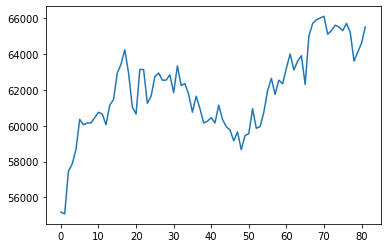

In [232]:
plt.plot(y)

`(1)` 아래와 같은 ${\bf x}$를 설정하라. 

$${\bf x}=(x_1,x_2,\dots,x_n)=\big(\frac{1}{n},\frac{2}{n},\dots,1\big)$$

${\bf x}=(x_1,\dots,x_n)$을 바탕으로 아래와 같은 매트릭스 ${\bf X}$를 생성하라. 단, $n={\tt len}({\boldsymbol y})$.

$${\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2\\ \dots & \dots \\ 1 & x_n \end{bmatrix}$$ 

In [233]:
x = np.arange(1,83)/82
X = np.stack([x**k for k in range(2)],axis=1)

`(2)` `(1)`에서 계산된 ${\bf X}$에 대하여 아래를 계산하라. 

$$\hat{\bf y}= {\bf X}({\bf X}^T {\bf X})^{-1}{\bf X}^T {\bf y}$$

$(x_i,y_i)$와 $(x_i,\hat{y}_i)$을 겹쳐서 시각화하라. 단, $\hat{\bf y}=(\hat{y}_1,\dots,\hat{y}_n)$. 

**hint:** 계산의 편의를 위하여 ${\bf y}$와 $\hat{\bf y}$은 모두 $n\times 1$ col-vector가 아닌 길이가 $n$인 벡터로 해석해도 무방하다. 

**hint**: ${\bf X}$를 아래와 같이 해석해도 무방하다. 

$${\bf X}=\begin{bmatrix} x_1^0 & x_1^1 \\ x_2^0 & x_2^1\\ \dots & \dots \\ x_n^0 & x_n^1 \end{bmatrix}$$ 

`(풀이)`

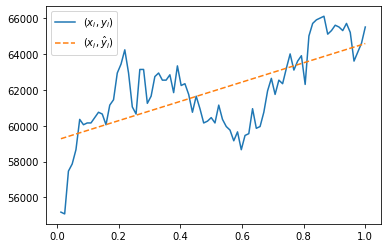

In [235]:
yhat= X@np.linalg.inv(X.T@ X)@ X.T @ y
plt.plot(x,y, label=r'$(x_i,y_i)$')
plt.plot(x,yhat,'--',label=r'$(x_i,\hat{y}_i)$')
plt.legend()

`3`. 아래와 같이 ${\bf X}$를 수정하라. 

$${\bf X}=\begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 & \dots & x_1^{10} \\ 1 & x_2 & x_2^2 & x_2^3 & \dots & x_2^{10} \\ \dots & \dots & \dots & \dots & \dots & \dots \\ 1 & x_n & x_n^2 & x_n^3 & \dots & x_n^{10} \end{bmatrix}$$ 

수정된 ${\bf X}$에 대하여 아래의 수식으로 $\hat{\bf y}$을 구하라. 

$$\hat{\bf y}= {\bf X}({\bf X}^T {\bf X})^{-1}{\bf X}^T {\bf y}$$

$(x_i,y_i)$와 $(x_i,\hat{y}_i)$을 겹쳐서 시각화하라. 단, $\hat{\bf y}=(\hat{y}_1,\dots,\hat{y}_n)$. 

`(풀이)`

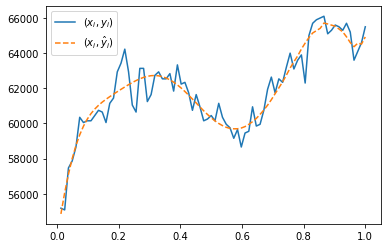

In [244]:
X = np.stack([x**k for k in range(11)],axis=1)
plt.plot(x,y, label=r'$(x_i,y_i)$')
plt.plot(x, X@np.linalg.inv(X.T@ X)@ X.T @ y,'--',label=r'$(x_i,\hat{y}_i)$')
plt.legend()

# 5. fashin MNIST data 추가문제 (30점)

이 문제는 2번문항의 추가문항입니다. 

In [53]:
# read data 
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')

# rshp 함수정의 
def rshp(row):
    return row.reshape(28,28)

# cleaning data 
xtrain = np.apply_along_axis(rshp,axis=1,arr=np.array(df_train.iloc[:,1:]))
xtest  = np.apply_along_axis(rshp,axis=1,arr=np.array(df_test.iloc[:,1:]))
ytrain = np.array(df_train.label)
ytest  = np.array(df_test.label)

`(1)` ${\tt xtrain}$에서 각 라벨에 대한 평균이미지를 계산하고 계산결과를 ${\tt imgmean}$에 길이가 10인 `list`로 저장하라. 즉 ${\tt imgmean}$은 아래와 같은 자료구조를 가지고 있어야 한다. 

- ${\tt imgmean}=\big[{\tt imgmean[0]},\dots, {\tt imgmean[9]}\big]$ 
- ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 (28,28)의 shape을 가진 numpy array 
- ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 숫자 0,1, ..., 9의 평균이미지를 의미

모든 $i=0,\dots,9$에 대하여 아래를 계산하고 

$${\tt dist}[i] = \frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt imgmean}[2][p,q]-{\tt imgmean}[i][p,q]\big)^2$$

${\tt dist}[i]$의 값이 가장 작은 $i$를 찾아라. 단 ${\tt dist}[i]=0$ 인 경우는 제외한다. (즉 2번 라벨과 평균이미지가 가장 비슷한 카테고리를 찾아라) 

**hint:** 4번라벨이 2번라벨과 가장 비슷하다. 

In [247]:
imgmean = [xtrain[ytrain==i].mean(axis=0) for i in range(10)] 
[np.mean((imgmean[i] - imgmean[2])**2) for i in range(10)]

[2597.2085496295,
 5878.065097639916,
 0.0,
 4213.533631714888,
 498.11027318129953,
 7492.365150424071,
 565.4023419996103,
 8216.785686526042,
 2762.121757294324,
 6135.9385566330075]

`(2)` `(1)`의 과정을 반복하여 아래의 평균이미지를 비슷한 카테고리로 묶는 작업을 하였다고 하자. 

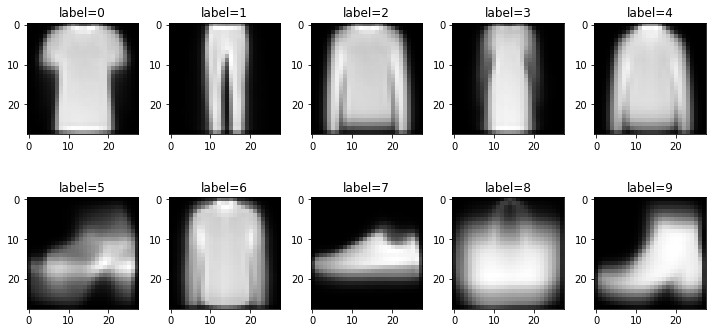

In [ ]:
# 평균이미지

작업결과 아래와 같이 비슷한 카테고리를 생각하였다고 하자. 

In [55]:
mapping_rule = {0:[0,2,3,4,6], 1:[1], 2:[5,7,9], 3:[8]}
mapping_rule

{0: [0, 2, 3, 4, 6], 1: [1], 2: [5, 7, 9], 3: [8]}

즉 기존의 0,2,3,4,6번에 해당하는 이미지는 모두 비슷하다고 판단하였다. 위에 제시된 mapping_rule에 의거하여 아래와 같이 라벨의 수정하는 변환을 수행하라. 

|Before|After|
|:-:|:-:|
|0|0|
|1|1|
|2|0|
|3|0|
|4|0|
|5|2|
|6|0|
|7|2|
|8|3|
|9|2|

수정된 라벨에 대하여 평균이미지를 다시 계산하여 `imgmean2`에 저장하고 아래의 코드를 이용하여 시각화하라. 

```Python
fig, ax = plt.subplots(1,4,figsize=(10,5))
for i in range(4):
    ax[i].imshow(imgmean2[i],cmap='gray')
```

`(풀이)`

In [56]:
ytrain2 = np.array([m for y in ytrain for m in mapping_rule if y in mapping_rule[m]])

In [57]:
imgmean2 = [xtrain[ytrain2==i].mean(axis=0) for i in range(4)] 

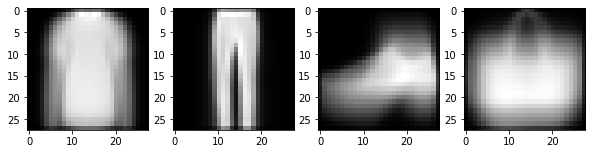

In [58]:
fig, ax = plt.subplots(1,4,figsize=(10,5))
for i in range(4):
    ax[i].imshow(imgmean2[i],cmap='gray')

`(3)` 수정된 라벨에 대하여 xtrain의 이미지를 분류하고 분류결과를 카테고리별로 제시하라. 

`(풀이)`

In [61]:
training_loss2 = np.array([[np.mean((xtrain[j,:,:]- imgmean2[i])**2) for i in range(4)] for j in range(60000)])
ytrain2_hat = training_loss2.argmin(axis=1)
{i:ytrain2_hat[ytrain2==i].tolist().count(i)/sum(ytrain2==i) for i in range(4)}

{0: 0.7493333333333333,
 1: 0.9443333333333334,
 2: 0.9379444444444445,
 3: 0.7983333333333333}

# 6. 동물명: 최하니 (20점)

아래는 동물명 "최하니"의 이미지이다. 

In [63]:
url = 'https://raw.githubusercontent.com/guebin/SC2022/main/hani.jpeg'
hani = np.einsum('ijk->jik',np.array(PIL.Image.open(io.BytesIO(requests.get(url).content))),dtype=np.int64)/255

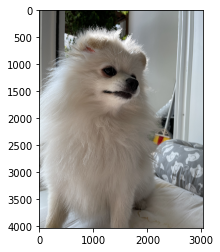

In [64]:
plt.imshow(hani)

아래는 하니를 적당히 분리하여 아래와 같이 `hani_left`와 `hini_right`를 만들고 시각화한 것이다. 

In [65]:
hani_left = hani[:,:1512,:].copy()
hani_right = hani[:,1512:,:].copy()

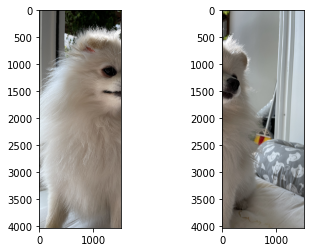

In [66]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(hani_left)
ax[1].imshow(hani_right)

`(1)` `hani_right[:,:,2]`의 모든 원소에 아래와 같은 변환을 수행하라. 

- $f(x)=\begin{cases} x & 1.15x >1.0 \\ 1.15x & 1.15x \leq 1.0 \end{cases}$

`(풀이)`

In [67]:
_a = hani_right[:,:,2] * (hani_right[:,:,2]*1.15 > 1.0)
_b = hani_right[:,:,2]*1.15 * (hani_right[:,:,2]*1.15 < 1.0)
hani_right[:,:,2] = _a + _b

`(2)` `hani_left`와 `(1)`에서 변환된 `hani_right`를 `np.concatenate`을 이용하여 합치고 결과를 시각화하라.

`(풀이)`

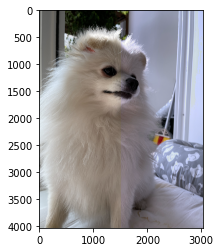

In [68]:
plt.imshow(np.concatenate([hani_left,hani_right],axis=1))

# 7. Naive Bayes classifier (120점) 

> ref: <https://towardsdatascience.com/the-naive-bayes-classifier-how-it-works-e229e7970b84>

***채점기준***

- (1),(2)를 모두 맞출경우: 40점
- (3),(4)를 모두 맞출경우: 80점 // (4)만 맞춰도 80점인정함
- 그 외의의 경우는 부분점수 없음 
- 확장불가능한 코드는 부분점수 없음 

아래의 데이터프레임은 날씨, 도로 상태, 교통 상황, 엔진 문제 및 사고 여부와 같은 여러 가지 변수를 포함하는 10개의 행과 5개의 열로 구성되어있다. 

In [70]:
df = pd.DataFrame({
    'WeatherCondition': ['rain', 'snow', 'clear', 'clear', 'snow', 'rain', 'rain', 'snow', 'clear', 'clear'],
    'RoadCondition': ['bad','average','bad','good','good','average','good','bad','good','bad'],
    'TrafficCondition': ['high','normal','light','light','normal','light','normal','high','high','high'],
    'EngineProblem': ['no','yes','no','yes','no','no','no','no','yes','yes'],
    'Accident': ['yes','yes','no','yes','no','no','no','yes','no','yes']
})

In [71]:
df

,WeatherCondition,RoadCondition,TrafficCondition,EngineProblem,Accident
0,rain,bad,high,no,yes
1,snow,average,normal,yes,yes
2,clear,bad,light,no,no
3,clear,good,light,yes,yes
4,snow,good,normal,no,no
5,rain,average,light,no,no
6,rain,good,normal,no,no
7,snow,bad,high,no,yes
8,clear,good,high,yes,no
9,clear,bad,high,yes,yes


각 열에 대한 설명은 아래와 같다. 

- 'WeatherCondition': 각 행에서 기록된 날씨 조건을 설명하며, 'rain'은 비, 'snow'는 눈, 'clear'는 맑은 날씨를 나타낸다. 
- 'RoadCondition':각 행에서 기록된 도로 상태를 설명하며, 'bad'는 안 좋은, 'average'는 보통, 'good'은 좋은 도로 상태를 나타낸다. 
- 'TrafficCondition':각 행에서 기록된 교통 상황을 설명하며, 'light'는 움직이기 쉬운, 'normal'은 평균, 'high'는 교통이 많은 상황을 나타낸다. 
- 'EngineProblem': 각 행에서 기록된 엔진 문제 여부를 설명하며, 'yes'는 문제가 있음을 나타내고, 'no'는 문제가 없음을 나타낸다. 
- 'Accident': 각 행에서 기록된 사고 여부를 설명하며, 'yes'는 사고가 있음을 나타내고, 'no'는 사고가 없음을 나타낸다. 

우리는 'WeatherCondition', 'RoadCondition', 'TrafficCondition', 'EngineProblem' 를 이용하여 'Accident' 행의 값이 yes일지 no일지를 판단하는 일에 관심이 있다고 하자. 아래의 (1)-(4) 이러한 분류를 수행하는 방법을 구체화 한 것이다. (1)-(4)의 물음에 답하라.

`(1)` 주어진 자료에서 $P({\tt Accident == no})$를 계산하여라. 

**hint**: `Accident=='yes'인 데이터수 / 전체데이터수`를 계산하면 되며 답은 0.5이다. 

`(풀이)`

In [72]:
len(df.query('Accident=="no"')) / 10

0.5

`(2)` 아래와 같은 조건부 확률은

$$P({\tt WeatherCondition == rain} ~|~ {\tt Accident==no})$$

아래와 같이 계산한다고 하자. 

In [508]:
# 방법1
len(df.query('WeatherCondition == "rain" and Accident == "no"'))/len(df.query('Accident=="no"'))

0.4

In [509]:
# 방법2
((df['WeatherCondition'] == 'rain') & (df['Accident']== 'no')).sum() / (df['Accident']== 'no').sum()

0.4

이와 유사한 방식으로 아래를 계산하라. 

- $P({\tt WeatherCondition == rain} ~|~ {\tt Accident==no})$ 
- $P({\tt WeatherCondition == snow} ~|~ {\tt Accident==no})$ 
- $\dots$
- $P({\tt EngineProblem == no} ~|~ {\tt Accident==yes})$ 
- $P({\tt EngineProblem == yes} ~|~ {\tt Accident==yes})$ 

계산결과는 아래와 같다. 

```
{'P(WeatherCondition=clear|Accident=no)': 0.4,
 'P(WeatherCondition=clear|Accident=yes)': 0.4,
 'P(WeatherCondition=rain|Accident=no)': 0.4,
 'P(WeatherCondition=rain|Accident=yes)': 0.2,
 'P(WeatherCondition=snow|Accident=no)': 0.2,
 'P(WeatherCondition=snow|Accident=yes)': 0.4,
 'P(RoadCondition=average|Accident=no)': 0.2,
 'P(RoadCondition=average|Accident=yes)': 0.2,
 'P(RoadCondition=good|Accident=no)': 0.6,
 'P(RoadCondition=good|Accident=yes)': 0.2,
 'P(RoadCondition=bad|Accident=no)': 0.2,
 'P(RoadCondition=bad|Accident=yes)': 0.6,
 'P(TrafficCondition=light|Accident=no)': 0.4,
 'P(TrafficCondition=light|Accident=yes)': 0.2,
 'P(TrafficCondition=high|Accident=no)': 0.2,
 'P(TrafficCondition=high|Accident=yes)': 0.6,
 'P(TrafficCondition=normal|Accident=no)': 0.4,
 'P(TrafficCondition=normal|Accident=yes)': 0.2,
 'P(EngineProblem=no|Accident=no)': 0.8,
 'P(EngineProblem=no|Accident=yes)': 0.4,
 'P(EngineProblem=yes|Accident=no)': 0.2,
 'P(EngineProblem=yes|Accident=yes)': 0.6}
```

`(풀이)`

In [316]:
*cond, _ = df.columns
{'P({}={}|Accident={})'.format(i,j,k): ((df[i]==j)&(df['Accident']==k)).sum()/(df['Accident']==k).sum() for i in cond for j in set(df[i]) for k in ['no','yes']}

{'P(WeatherCondition=clear|Accident=no)': 0.4,
 'P(WeatherCondition=clear|Accident=yes)': 0.4,
 'P(WeatherCondition=rain|Accident=no)': 0.4,
 'P(WeatherCondition=rain|Accident=yes)': 0.2,
 'P(WeatherCondition=snow|Accident=no)': 0.2,
 'P(WeatherCondition=snow|Accident=yes)': 0.4,
 'P(RoadCondition=average|Accident=no)': 0.2,
 'P(RoadCondition=average|Accident=yes)': 0.2,
 'P(RoadCondition=bad|Accident=no)': 0.2,
 'P(RoadCondition=bad|Accident=yes)': 0.6,
 'P(RoadCondition=good|Accident=no)': 0.6,
 'P(RoadCondition=good|Accident=yes)': 0.2,
 'P(TrafficCondition=normal|Accident=no)': 0.4,
 'P(TrafficCondition=normal|Accident=yes)': 0.2,
 'P(TrafficCondition=light|Accident=no)': 0.4,
 'P(TrafficCondition=light|Accident=yes)': 0.2,
 'P(TrafficCondition=high|Accident=no)': 0.2,
 'P(TrafficCondition=high|Accident=yes)': 0.6,
 'P(EngineProblem=yes|Accident=no)': 0.2,
 'P(EngineProblem=yes|Accident=yes)': 0.6,
 'P(EngineProblem=no|Accident=no)': 0.8,
 'P(EngineProblem=no|Accident=yes)': 0.4}

`(3)` 아래와 같은 새로운 상황이 발생하였다고 가정하자. 

- ${\tt WeatherCondition==rain}$
- ${\tt RoadCondition==good}$
- ${\tt TraffictCondition==normal}$
- ${\tt EngineProblem==no}$


아래를 각각 계산하라. 

$\begin{align}
A&=P({\tt Accident == yes})\\
&\times P({\tt WeatherCondition==rain~ |~ Accident == yes}) \\  
&\times P({\tt RoadCondition==good~|~ Accident == yes}) \\ 
&\times P({\tt TrafficCondition==normal~ |~ Accident == yes}) \\ 
&\times P({\tt EngineProblem=no~ |~ Accident == yes})
\end{align}$

$\begin{align}
B&=P({\tt Accident ==no})\\
&\times P({\tt WeatherCondition==rain~ |~ Accident == no}) \\  
&\times P({\tt RoadCondition==good~|~ Accident == no}) \\ 
&\times P({\tt TrafficCondition==normal~ |~ Accident == no}) \\ 
&\times P({\tt EngineProblem=no~ |~ Accident == no})
\end{align}$

여기에서 $\frac{A}{A+B}$와 $\frac{B}{A+B}$를 각각 주어진 상황에 대하여 사고가 날 확률, 사고가 나지 않을 확률을 의미한다고 하자. 주어진 상황에서 사고가 날 확률은 얼마인가? 

**hint:** 답은 1/25

`(풀이)`

In [279]:
dct = {(j,k):((df[i]==j)&(df['Accident']==k)).sum()/(df['Accident']==k).sum() for i in cond for j in set(df[i]) for k in ['no','yes']}
dct

{('clear', 'no'): 0.4,
 ('clear', 'yes'): 0.4,
 ('rain', 'no'): 0.4,
 ('rain', 'yes'): 0.2,
 ('snow', 'no'): 0.2,
 ('snow', 'yes'): 0.4,
 ('average', 'no'): 0.2,
 ('average', 'yes'): 0.2,
 ('bad', 'no'): 0.2,
 ('bad', 'yes'): 0.6,
 ('good', 'no'): 0.6,
 ('good', 'yes'): 0.2,
 ('normal', 'no'): 0.4,
 ('normal', 'yes'): 0.2,
 ('light', 'no'): 0.4,
 ('light', 'yes'): 0.2,
 ('high', 'no'): 0.2,
 ('high', 'yes'): 0.6,
 ('yes', 'no'): 0.2,
 ('yes', 'yes'): 0.6,
 ('no', 'no'): 0.8,
 ('no', 'yes'): 0.4}

- dct의 키는 `(WeatherCondition~EngineProblem의 라벨, Accident의 라벨)`로 이루어짐 

In [223]:
A = dct['rain','yes']*dct['good','yes']*dct['normal','yes']*dct['no','yes']
B = dct['rain','no']*dct['good','no']*dct['normal','no']*dct['no','no']

In [238]:
A/(A+B) # 실제정답은 0.04, 0.000000000000000015는 에러

0.040000000000000015

`(4)` 모든 상황에 대하여 사고가 날 확률을 구하여라. 

`(풀이1)`

In [152]:
W = set(df.WeatherCondition)
R = set(df.RoadCondition)
T = set(df.TrafficCondition)
E = set(df.EngineProblem)

In [237]:
df2 = pd.DataFrame([[w,r,t,e,dct[w,'yes']*dct[r,'yes']*dct[t,'yes']*dct[e,'yes'],dct[w,'no']*dct[r,'no']*dct[t,'no']*dct[e,'no']] for w in W for r in R for t in T for e in E])
df2.columns = pd.Index(['WeatherCondition','RoadCondition','TrafficCondition','EngineProblem','A','B'])
df2.eval('Prob = A/(A+B)')

,WeatherCondition,RoadCondition,TrafficCondition,EngineProblem,A,B,Prob
0,clear,average,normal,yes,0.0096,0.0064,0.600000
1,clear,average,normal,no,0.0064,0.0256,0.200000
2,clear,average,light,yes,0.0096,0.0064,0.600000
3,clear,average,light,no,0.0064,0.0256,0.200000
4,clear,average,high,yes,0.0288,0.0032,0.900000
5,clear,average,high,no,0.0192,0.0128,0.600000
6,clear,bad,normal,yes,0.0288,0.0064,0.818182
7,clear,bad,normal,no,0.0192,0.0256,0.428571
8,clear,bad,light,yes,0.0288,0.0064,0.818182
9,clear,bad,light,no,0.0192,0.0256,0.428571


`(풀이2)` -- 좀 더 일반적인 풀이 

In [306]:
import itertools
lst = []
for cond_details in itertools.product(*[set(df[col_name]) for col_name in cond]):
    A=1;
    B=1;
    for c in cond_details:
        A = A*dct[c,'yes']
        B = B*dct[c,'no']
    lst.append([*combination,A,B,A/(A+B)])

In [307]:
df2 = pd.DataFrame(lst)
df2.columns = pd.Index(['WeatherCondition','RoadCondition','TrafficCondition','EngineProblem','A','B','Prob'])
df2

,WeatherCondition,RoadCondition,TrafficCondition,EngineProblem,A,B,Prob
0,snow,good,high,no,0.0096,0.0064,0.600000
1,snow,good,high,no,0.0064,0.0256,0.200000
2,snow,good,high,no,0.0096,0.0064,0.600000
3,snow,good,high,no,0.0064,0.0256,0.200000
4,snow,good,high,no,0.0288,0.0032,0.900000
5,snow,good,high,no,0.0192,0.0128,0.600000
6,snow,good,high,no,0.0288,0.0064,0.818182
7,snow,good,high,no,0.0192,0.0256,0.428571
8,snow,good,high,no,0.0288,0.0064,0.818182
9,snow,good,high,no,0.0192,0.0256,0.428571
